In [1]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras import regularizers



Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
x = boston.data
x.shape

(506, 13)

In [5]:
y = boston.target

In [6]:
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [8]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
['{:f}'.format(x) for x in x[0]]


['0.006320',
 '18.000000',
 '2.310000',
 '0.000000',
 '0.538000',
 '6.575000',
 '65.200000',
 '4.090000',
 '1.000000',
 '296.000000',
 '15.300000',
 '396.900000',
 '4.980000']

In [10]:
type(boston.data)

numpy.ndarray

In [11]:
len(x[:,1])

506

In [12]:
x.shape

(506, 13)

In [13]:
# respounder = x[:,1]

In [14]:
# predictors = np.delete(x, 0, 1) 

In [15]:
# print(predictors)

In [16]:
# predictors.shape

In [17]:
# x=np.reshape(x, (-1,1))
# y=np.reshape(y, (-1,1))
# scaler = MinMaxScaler()
# print(scaler.fit(x))
# print(scaler.fit(y))
# xscale=scaler.transform(x)
# yscale=scaler.transform(y)

In [18]:
model = Sequential()
model.add(Dense(13, input_dim=13,use_bias=True, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu',use_bias=True, kernel_regularizer=regularizers.l1(l=0.03)))
model.add(Dense(1,use_bias=True, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


In [20]:
history = model.fit(x,y, epochs=1000, batch_size=50,  verbose=1, validation_split=0.2)


Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 660us/step - loss: 117.4384 - mean_squared_error: 116.6231 - mean_absolute_error: 8.1962 - val_loss: 64.1392 - val_mean_squared_error: 63.3349 - val_mean_absolute_error: 6.2578
Epoch 2/1000
404/404 [==============================] - 0s 41us/step - loss: 95.0603 - mean_squared_error: 94.2624 - mean_absolute_error: 6.7603 - val_loss: 67.5013 - val_mean_squared_error: 66.7128 - val_mean_absolute_error: 6.5391
Epoch 3/1000
404/404 [==============================] - 0s 40us/step - loss: 87.4596 - mean_squared_error: 86.6769 - mean_absolute_error: 6.8871 - val_loss: 69.1104 - val_mean_squared_error: 68.3365 - val_mean_absolute_error: 6.8695
Epoch 4/1000
404/404 [==============================] - 0s 41us/step - loss: 83.2043 - mean_squared_error: 82.4359 - mean_absolute_error: 6.8256 - val_loss: 65.7933 - val_mean_squared_error: 65.0334 - val

Epoch 35/1000
404/404 [==============================] - 0s 35us/step - loss: 57.3862 - mean_squared_error: 56.9060 - mean_absolute_error: 5.3755 - val_loss: 29.2168 - val_mean_squared_error: 28.7399 - val_mean_absolute_error: 4.3065
Epoch 36/1000
404/404 [==============================] - 0s 33us/step - loss: 55.9055 - mean_squared_error: 55.4306 - mean_absolute_error: 5.2336 - val_loss: 30.4377 - val_mean_squared_error: 29.9659 - val_mean_absolute_error: 4.4326
Epoch 37/1000
404/404 [==============================] - 0s 33us/step - loss: 55.8651 - mean_squared_error: 55.3955 - mean_absolute_error: 5.5452 - val_loss: 30.3622 - val_mean_squared_error: 29.8959 - val_mean_absolute_error: 4.4364
Epoch 38/1000
404/404 [==============================] - 0s 33us/step - loss: 54.5430 - mean_squared_error: 54.0787 - mean_absolute_error: 5.3013 - val_loss: 29.1538 - val_mean_squared_error: 28.6925 - val_mean_absolute_error: 4.3138
Epoch 39/1000
404/404 [==============================] - 0s 44us

404/404 [==============================] - 0s 40us/step - loss: 37.1719 - mean_squared_error: 36.7505 - mean_absolute_error: 4.3845 - val_loss: 25.1269 - val_mean_squared_error: 24.7055 - val_mean_absolute_error: 3.9888
Epoch 71/1000
404/404 [==============================] - 0s 32us/step - loss: 36.1837 - mean_squared_error: 35.7622 - mean_absolute_error: 4.2919 - val_loss: 28.9809 - val_mean_squared_error: 28.5595 - val_mean_absolute_error: 4.3825
Epoch 72/1000
404/404 [==============================] - 0s 36us/step - loss: 36.2241 - mean_squared_error: 35.8028 - mean_absolute_error: 4.2753 - val_loss: 32.6635 - val_mean_squared_error: 32.2421 - val_mean_absolute_error: 4.7216
Epoch 73/1000
404/404 [==============================] - 0s 35us/step - loss: 36.1855 - mean_squared_error: 35.7643 - mean_absolute_error: 4.2019 - val_loss: 33.3059 - val_mean_squared_error: 32.8847 - val_mean_absolute_error: 4.7789
Epoch 74/1000
404/404 [==============================] - 0s 36us/step - loss: 

404/404 [==============================] - 0s 34us/step - loss: 29.5545 - mean_squared_error: 29.1387 - mean_absolute_error: 4.1412 - val_loss: 32.3629 - val_mean_squared_error: 31.9475 - val_mean_absolute_error: 4.5719
Epoch 106/1000
404/404 [==============================] - 0s 31us/step - loss: 29.2461 - mean_squared_error: 28.8308 - mean_absolute_error: 3.8234 - val_loss: 48.7031 - val_mean_squared_error: 48.2880 - val_mean_absolute_error: 5.6757
Epoch 107/1000
404/404 [==============================] - 0s 34us/step - loss: 27.9379 - mean_squared_error: 27.5229 - mean_absolute_error: 3.8592 - val_loss: 48.4154 - val_mean_squared_error: 48.0006 - val_mean_absolute_error: 5.5849
Epoch 108/1000
404/404 [==============================] - 0s 31us/step - loss: 27.0720 - mean_squared_error: 26.6574 - mean_absolute_error: 3.8304 - val_loss: 51.3783 - val_mean_squared_error: 50.9640 - val_mean_absolute_error: 5.7654
Epoch 109/1000
404/404 [==============================] - 0s 33us/step - lo

Epoch 140/1000
404/404 [==============================] - 0s 33us/step - loss: 28.6246 - mean_squared_error: 28.1988 - mean_absolute_error: 3.6074 - val_loss: 94.3134 - val_mean_squared_error: 93.8869 - val_mean_absolute_error: 8.3671
Epoch 141/1000
404/404 [==============================] - 0s 33us/step - loss: 36.0431 - mean_squared_error: 35.6166 - mean_absolute_error: 4.5700 - val_loss: 41.2080 - val_mean_squared_error: 40.7823 - val_mean_absolute_error: 5.1796
Epoch 142/1000
404/404 [==============================] - 0s 35us/step - loss: 30.5634 - mean_squared_error: 30.1376 - mean_absolute_error: 3.9952 - val_loss: 49.2833 - val_mean_squared_error: 48.8578 - val_mean_absolute_error: 5.7357
Epoch 143/1000
404/404 [==============================] - 0s 33us/step - loss: 22.7354 - mean_squared_error: 22.3101 - mean_absolute_error: 3.4178 - val_loss: 36.9285 - val_mean_squared_error: 36.5033 - val_mean_absolute_error: 5.0124
Epoch 144/1000
404/404 [==============================] - 0s

Epoch 175/1000
404/404 [==============================] - 0s 29us/step - loss: 20.0218 - mean_squared_error: 19.5867 - mean_absolute_error: 3.1440 - val_loss: 30.3066 - val_mean_squared_error: 29.8715 - val_mean_absolute_error: 4.4620
Epoch 176/1000
404/404 [==============================] - 0s 29us/step - loss: 19.6740 - mean_squared_error: 19.2390 - mean_absolute_error: 3.0701 - val_loss: 30.9309 - val_mean_squared_error: 30.4958 - val_mean_absolute_error: 4.4971
Epoch 177/1000
404/404 [==============================] - 0s 30us/step - loss: 20.0785 - mean_squared_error: 19.6435 - mean_absolute_error: 3.1775 - val_loss: 26.6819 - val_mean_squared_error: 26.2468 - val_mean_absolute_error: 4.2446
Epoch 178/1000
404/404 [==============================] - 0s 39us/step - loss: 20.6065 - mean_squared_error: 20.1712 - mean_absolute_error: 3.2565 - val_loss: 32.0802 - val_mean_squared_error: 31.6447 - val_mean_absolute_error: 4.5386
Epoch 179/1000
404/404 [==============================] - 0s

Epoch 210/1000
404/404 [==============================] - 0s 34us/step - loss: 19.5360 - mean_squared_error: 19.0911 - mean_absolute_error: 3.0540 - val_loss: 22.9407 - val_mean_squared_error: 22.4954 - val_mean_absolute_error: 3.8572
Epoch 211/1000
404/404 [==============================] - 0s 40us/step - loss: 19.3485 - mean_squared_error: 18.9032 - mean_absolute_error: 3.0440 - val_loss: 26.9863 - val_mean_squared_error: 26.5407 - val_mean_absolute_error: 4.1623
Epoch 212/1000
404/404 [==============================] - 0s 34us/step - loss: 18.1102 - mean_squared_error: 17.6645 - mean_absolute_error: 3.0467 - val_loss: 27.7316 - val_mean_squared_error: 27.2858 - val_mean_absolute_error: 4.3115
Epoch 213/1000
404/404 [==============================] - 0s 36us/step - loss: 18.0482 - mean_squared_error: 17.6024 - mean_absolute_error: 3.0035 - val_loss: 34.3478 - val_mean_squared_error: 33.9019 - val_mean_absolute_error: 4.7111
Epoch 214/1000
404/404 [==============================] - 0s

Epoch 245/1000
404/404 [==============================] - 0s 29us/step - loss: 17.6205 - mean_squared_error: 17.1690 - mean_absolute_error: 2.9928 - val_loss: 24.6062 - val_mean_squared_error: 24.1547 - val_mean_absolute_error: 4.0467
Epoch 246/1000
404/404 [==============================] - 0s 29us/step - loss: 17.7273 - mean_squared_error: 17.2757 - mean_absolute_error: 2.8828 - val_loss: 27.5464 - val_mean_squared_error: 27.0947 - val_mean_absolute_error: 4.2301
Epoch 247/1000
404/404 [==============================] - 0s 31us/step - loss: 17.3747 - mean_squared_error: 16.9229 - mean_absolute_error: 2.9457 - val_loss: 23.9919 - val_mean_squared_error: 23.5403 - val_mean_absolute_error: 3.9396
Epoch 248/1000
404/404 [==============================] - 0s 35us/step - loss: 20.0631 - mean_squared_error: 19.6114 - mean_absolute_error: 3.0762 - val_loss: 42.8073 - val_mean_squared_error: 42.3554 - val_mean_absolute_error: 5.3492
Epoch 249/1000
404/404 [==============================] - 0s

Epoch 280/1000
404/404 [==============================] - 0s 30us/step - loss: 17.9901 - mean_squared_error: 17.5345 - mean_absolute_error: 3.0171 - val_loss: 23.1734 - val_mean_squared_error: 22.7180 - val_mean_absolute_error: 3.9244
Epoch 281/1000
404/404 [==============================] - 0s 35us/step - loss: 18.4840 - mean_squared_error: 18.0285 - mean_absolute_error: 2.9073 - val_loss: 33.1953 - val_mean_squared_error: 32.7396 - val_mean_absolute_error: 4.6175
Epoch 282/1000
404/404 [==============================] - 0s 33us/step - loss: 17.0301 - mean_squared_error: 16.5745 - mean_absolute_error: 2.9666 - val_loss: 23.4060 - val_mean_squared_error: 22.9506 - val_mean_absolute_error: 3.9033
Epoch 283/1000
404/404 [==============================] - 0s 31us/step - loss: 16.6430 - mean_squared_error: 16.1877 - mean_absolute_error: 2.8527 - val_loss: 28.1328 - val_mean_squared_error: 27.6776 - val_mean_absolute_error: 4.3156
Epoch 284/1000
404/404 [==============================] - 0s

Epoch 315/1000
404/404 [==============================] - 0s 31us/step - loss: 15.9333 - mean_squared_error: 15.4777 - mean_absolute_error: 2.7921 - val_loss: 21.0304 - val_mean_squared_error: 20.5750 - val_mean_absolute_error: 3.6450
Epoch 316/1000
404/404 [==============================] - 0s 36us/step - loss: 22.9902 - mean_squared_error: 22.5353 - mean_absolute_error: 3.1448 - val_loss: 20.5029 - val_mean_squared_error: 20.0483 - val_mean_absolute_error: 3.2334
Epoch 317/1000
404/404 [==============================] - 0s 34us/step - loss: 21.4479 - mean_squared_error: 20.9935 - mean_absolute_error: 3.2647 - val_loss: 27.6522 - val_mean_squared_error: 27.1982 - val_mean_absolute_error: 4.0140
Epoch 318/1000
404/404 [==============================] - 0s 32us/step - loss: 22.9136 - mean_squared_error: 22.4597 - mean_absolute_error: 3.1946 - val_loss: 20.6245 - val_mean_squared_error: 20.1704 - val_mean_absolute_error: 3.3676
Epoch 319/1000
404/404 [==============================] - 0s

Epoch 350/1000
404/404 [==============================] - 0s 28us/step - loss: 17.2000 - mean_squared_error: 16.7439 - mean_absolute_error: 2.8961 - val_loss: 22.3807 - val_mean_squared_error: 21.9245 - val_mean_absolute_error: 3.8130
Epoch 351/1000
404/404 [==============================] - 0s 29us/step - loss: 16.0836 - mean_squared_error: 15.6272 - mean_absolute_error: 2.7827 - val_loss: 23.8087 - val_mean_squared_error: 23.3520 - val_mean_absolute_error: 3.8165
Epoch 352/1000
404/404 [==============================] - 0s 37us/step - loss: 15.5628 - mean_squared_error: 15.1060 - mean_absolute_error: 2.7598 - val_loss: 23.6696 - val_mean_squared_error: 23.2127 - val_mean_absolute_error: 3.9113
Epoch 353/1000
404/404 [==============================] - 0s 30us/step - loss: 15.8981 - mean_squared_error: 15.4412 - mean_absolute_error: 2.7648 - val_loss: 21.9048 - val_mean_squared_error: 21.4480 - val_mean_absolute_error: 3.7766
Epoch 354/1000
404/404 [==============================] - 0s

Epoch 385/1000
404/404 [==============================] - 0s 32us/step - loss: 15.5069 - mean_squared_error: 15.0482 - mean_absolute_error: 2.7333 - val_loss: 25.7088 - val_mean_squared_error: 25.2501 - val_mean_absolute_error: 4.0465
Epoch 386/1000
404/404 [==============================] - 0s 31us/step - loss: 15.4849 - mean_squared_error: 15.0262 - mean_absolute_error: 2.6931 - val_loss: 22.1687 - val_mean_squared_error: 21.7101 - val_mean_absolute_error: 3.7446
Epoch 387/1000
404/404 [==============================] - 0s 31us/step - loss: 16.4486 - mean_squared_error: 15.9901 - mean_absolute_error: 2.8010 - val_loss: 21.4244 - val_mean_squared_error: 20.9659 - val_mean_absolute_error: 3.7157
Epoch 388/1000
404/404 [==============================] - 0s 34us/step - loss: 18.7343 - mean_squared_error: 18.2755 - mean_absolute_error: 2.9648 - val_loss: 27.8789 - val_mean_squared_error: 27.4199 - val_mean_absolute_error: 4.1786
Epoch 389/1000
404/404 [==============================] - 0s

Epoch 420/1000
404/404 [==============================] - 0s 33us/step - loss: 22.9728 - mean_squared_error: 22.5139 - mean_absolute_error: 3.4591 - val_loss: 25.5523 - val_mean_squared_error: 25.0938 - val_mean_absolute_error: 3.8634
Epoch 421/1000
404/404 [==============================] - 0s 34us/step - loss: 20.4029 - mean_squared_error: 19.9444 - mean_absolute_error: 3.1161 - val_loss: 18.8965 - val_mean_squared_error: 18.4380 - val_mean_absolute_error: 3.3007
Epoch 422/1000
404/404 [==============================] - 0s 37us/step - loss: 17.4169 - mean_squared_error: 16.9583 - mean_absolute_error: 2.8848 - val_loss: 18.1854 - val_mean_squared_error: 17.7267 - val_mean_absolute_error: 3.2517
Epoch 423/1000
404/404 [==============================] - 0s 37us/step - loss: 17.4729 - mean_squared_error: 17.0143 - mean_absolute_error: 2.8428 - val_loss: 20.0168 - val_mean_squared_error: 19.5581 - val_mean_absolute_error: 3.5611
Epoch 424/1000
404/404 [==============================] - 0s

Epoch 455/1000
404/404 [==============================] - 0s 28us/step - loss: 15.0267 - mean_squared_error: 14.5705 - mean_absolute_error: 2.6460 - val_loss: 23.9465 - val_mean_squared_error: 23.4901 - val_mean_absolute_error: 3.8431
Epoch 456/1000
404/404 [==============================] - 0s 28us/step - loss: 15.1014 - mean_squared_error: 14.6450 - mean_absolute_error: 2.7159 - val_loss: 23.9286 - val_mean_squared_error: 23.4723 - val_mean_absolute_error: 4.0094
Epoch 457/1000
404/404 [==============================] - 0s 31us/step - loss: 16.0610 - mean_squared_error: 15.6046 - mean_absolute_error: 2.7703 - val_loss: 24.0705 - val_mean_squared_error: 23.6141 - val_mean_absolute_error: 3.9498
Epoch 458/1000
404/404 [==============================] - 0s 31us/step - loss: 17.2297 - mean_squared_error: 16.7735 - mean_absolute_error: 2.8053 - val_loss: 20.5512 - val_mean_squared_error: 20.0950 - val_mean_absolute_error: 3.5245
Epoch 459/1000
404/404 [==============================] - 0s

Epoch 490/1000
404/404 [==============================] - 0s 30us/step - loss: 14.7261 - mean_squared_error: 14.2700 - mean_absolute_error: 2.6428 - val_loss: 22.4746 - val_mean_squared_error: 22.0185 - val_mean_absolute_error: 3.7599
Epoch 491/1000
404/404 [==============================] - 0s 31us/step - loss: 14.4994 - mean_squared_error: 14.0432 - mean_absolute_error: 2.6183 - val_loss: 24.6008 - val_mean_squared_error: 24.1445 - val_mean_absolute_error: 3.9302
Epoch 492/1000
404/404 [==============================] - 0s 35us/step - loss: 14.4383 - mean_squared_error: 13.9821 - mean_absolute_error: 2.6227 - val_loss: 24.3355 - val_mean_squared_error: 23.8793 - val_mean_absolute_error: 3.8907
Epoch 493/1000
404/404 [==============================] - 0s 32us/step - loss: 14.7763 - mean_squared_error: 14.3201 - mean_absolute_error: 2.7313 - val_loss: 22.3027 - val_mean_squared_error: 21.8468 - val_mean_absolute_error: 3.7603
Epoch 494/1000
404/404 [==============================] - 0s

Epoch 525/1000
404/404 [==============================] - 0s 33us/step - loss: 17.5208 - mean_squared_error: 17.0671 - mean_absolute_error: 2.9976 - val_loss: 20.2263 - val_mean_squared_error: 19.7728 - val_mean_absolute_error: 3.5342
Epoch 526/1000
404/404 [==============================] - 0s 33us/step - loss: 17.2485 - mean_squared_error: 16.7951 - mean_absolute_error: 2.8269 - val_loss: 21.8077 - val_mean_squared_error: 21.3543 - val_mean_absolute_error: 3.6649
Epoch 527/1000
404/404 [==============================] - 0s 31us/step - loss: 15.4273 - mean_squared_error: 14.9739 - mean_absolute_error: 2.7039 - val_loss: 21.8232 - val_mean_squared_error: 21.3699 - val_mean_absolute_error: 3.6969
Epoch 528/1000
404/404 [==============================] - 0s 35us/step - loss: 15.4270 - mean_squared_error: 14.9737 - mean_absolute_error: 2.6988 - val_loss: 21.5429 - val_mean_squared_error: 21.0898 - val_mean_absolute_error: 3.6482
Epoch 529/1000
404/404 [==============================] - 0s

Epoch 560/1000
404/404 [==============================] - 0s 34us/step - loss: 14.0867 - mean_squared_error: 13.6359 - mean_absolute_error: 2.5410 - val_loss: 27.8437 - val_mean_squared_error: 27.3927 - val_mean_absolute_error: 4.1902
Epoch 561/1000
404/404 [==============================] - 0s 32us/step - loss: 15.6194 - mean_squared_error: 15.1684 - mean_absolute_error: 2.7508 - val_loss: 21.7334 - val_mean_squared_error: 21.2825 - val_mean_absolute_error: 3.7252
Epoch 562/1000
404/404 [==============================] - 0s 34us/step - loss: 15.2851 - mean_squared_error: 14.8341 - mean_absolute_error: 2.6402 - val_loss: 24.9829 - val_mean_squared_error: 24.5318 - val_mean_absolute_error: 3.9462
Epoch 563/1000
404/404 [==============================] - 0s 37us/step - loss: 13.7477 - mean_squared_error: 13.2965 - mean_absolute_error: 2.5738 - val_loss: 23.6693 - val_mean_squared_error: 23.2182 - val_mean_absolute_error: 3.8993
Epoch 564/1000
404/404 [==============================] - 0s

Epoch 595/1000
404/404 [==============================] - 0s 34us/step - loss: 14.0586 - mean_squared_error: 13.6092 - mean_absolute_error: 2.5475 - val_loss: 23.1156 - val_mean_squared_error: 22.6662 - val_mean_absolute_error: 3.7792
Epoch 596/1000
404/404 [==============================] - 0s 33us/step - loss: 14.3898 - mean_squared_error: 13.9404 - mean_absolute_error: 2.5898 - val_loss: 24.3132 - val_mean_squared_error: 23.8636 - val_mean_absolute_error: 3.8413
Epoch 597/1000
404/404 [==============================] - 0s 33us/step - loss: 14.0512 - mean_squared_error: 13.6016 - mean_absolute_error: 2.5741 - val_loss: 23.5711 - val_mean_squared_error: 23.1216 - val_mean_absolute_error: 3.8365
Epoch 598/1000
404/404 [==============================] - 0s 34us/step - loss: 14.8250 - mean_squared_error: 14.3754 - mean_absolute_error: 2.6537 - val_loss: 26.9889 - val_mean_squared_error: 26.5392 - val_mean_absolute_error: 4.0718
Epoch 599/1000
404/404 [==============================] - 0s

Epoch 630/1000
404/404 [==============================] - 0s 35us/step - loss: 14.7006 - mean_squared_error: 14.2517 - mean_absolute_error: 2.6577 - val_loss: 29.0455 - val_mean_squared_error: 28.5963 - val_mean_absolute_error: 4.2431
Epoch 631/1000
404/404 [==============================] - 0s 33us/step - loss: 15.2853 - mean_squared_error: 14.8363 - mean_absolute_error: 2.6764 - val_loss: 23.5145 - val_mean_squared_error: 23.0655 - val_mean_absolute_error: 3.7277
Epoch 632/1000
404/404 [==============================] - 0s 39us/step - loss: 15.5156 - mean_squared_error: 15.0665 - mean_absolute_error: 2.7451 - val_loss: 21.8042 - val_mean_squared_error: 21.3555 - val_mean_absolute_error: 3.5938
Epoch 633/1000
404/404 [==============================] - 0s 35us/step - loss: 16.3802 - mean_squared_error: 15.9315 - mean_absolute_error: 2.7248 - val_loss: 27.7261 - val_mean_squared_error: 27.2770 - val_mean_absolute_error: 4.1280
Epoch 634/1000
404/404 [==============================] - 0s

Epoch 665/1000
404/404 [==============================] - 0s 32us/step - loss: 15.0283 - mean_squared_error: 14.5797 - mean_absolute_error: 2.5987 - val_loss: 30.7162 - val_mean_squared_error: 30.2674 - val_mean_absolute_error: 4.4103
Epoch 666/1000
404/404 [==============================] - 0s 33us/step - loss: 13.7013 - mean_squared_error: 13.2526 - mean_absolute_error: 2.5766 - val_loss: 22.8949 - val_mean_squared_error: 22.4463 - val_mean_absolute_error: 3.7287
Epoch 667/1000
404/404 [==============================] - 0s 34us/step - loss: 14.0206 - mean_squared_error: 13.5718 - mean_absolute_error: 2.5925 - val_loss: 30.9317 - val_mean_squared_error: 30.4828 - val_mean_absolute_error: 4.4037
Epoch 668/1000
404/404 [==============================] - 0s 40us/step - loss: 23.3572 - mean_squared_error: 22.9083 - mean_absolute_error: 3.3113 - val_loss: 29.5853 - val_mean_squared_error: 29.1370 - val_mean_absolute_error: 4.2736
Epoch 669/1000
404/404 [==============================] - 0s

Epoch 700/1000
404/404 [==============================] - 0s 35us/step - loss: 14.6181 - mean_squared_error: 14.1740 - mean_absolute_error: 2.6690 - val_loss: 33.4477 - val_mean_squared_error: 33.0039 - val_mean_absolute_error: 4.6340
Epoch 701/1000
404/404 [==============================] - 0s 34us/step - loss: 13.8363 - mean_squared_error: 13.3926 - mean_absolute_error: 2.5438 - val_loss: 25.8274 - val_mean_squared_error: 25.3840 - val_mean_absolute_error: 4.0445
Epoch 702/1000
404/404 [==============================] - 0s 33us/step - loss: 13.5116 - mean_squared_error: 13.0682 - mean_absolute_error: 2.5292 - val_loss: 26.2384 - val_mean_squared_error: 25.7952 - val_mean_absolute_error: 4.0613
Epoch 703/1000
404/404 [==============================] - 0s 33us/step - loss: 13.3140 - mean_squared_error: 12.8709 - mean_absolute_error: 2.4863 - val_loss: 28.7151 - val_mean_squared_error: 28.2720 - val_mean_absolute_error: 4.2647
Epoch 704/1000
404/404 [==============================] - 0s

Epoch 735/1000
404/404 [==============================] - 0s 40us/step - loss: 13.0623 - mean_squared_error: 12.6216 - mean_absolute_error: 2.4892 - val_loss: 29.0468 - val_mean_squared_error: 28.6059 - val_mean_absolute_error: 4.2481
Epoch 736/1000
404/404 [==============================] - 0s 44us/step - loss: 13.1104 - mean_squared_error: 12.6697 - mean_absolute_error: 2.4970 - val_loss: 25.0297 - val_mean_squared_error: 24.5891 - val_mean_absolute_error: 3.9840
Epoch 737/1000
404/404 [==============================] - 0s 39us/step - loss: 13.4838 - mean_squared_error: 13.0432 - mean_absolute_error: 2.5051 - val_loss: 25.0431 - val_mean_squared_error: 24.6023 - val_mean_absolute_error: 3.9234
Epoch 738/1000
404/404 [==============================] - 0s 34us/step - loss: 13.1110 - mean_squared_error: 12.6702 - mean_absolute_error: 2.4846 - val_loss: 24.4138 - val_mean_squared_error: 23.9731 - val_mean_absolute_error: 3.7977
Epoch 739/1000
404/404 [==============================] - 0s

Epoch 770/1000
404/404 [==============================] - 0s 30us/step - loss: 13.3342 - mean_squared_error: 12.8936 - mean_absolute_error: 2.5104 - val_loss: 31.2647 - val_mean_squared_error: 30.8241 - val_mean_absolute_error: 4.4726
Epoch 771/1000
404/404 [==============================] - 0s 31us/step - loss: 14.4290 - mean_squared_error: 13.9884 - mean_absolute_error: 2.6542 - val_loss: 24.1721 - val_mean_squared_error: 23.7318 - val_mean_absolute_error: 3.8821
Epoch 772/1000
404/404 [==============================] - 0s 31us/step - loss: 13.3602 - mean_squared_error: 12.9198 - mean_absolute_error: 2.4898 - val_loss: 27.4805 - val_mean_squared_error: 27.0399 - val_mean_absolute_error: 4.0985
Epoch 773/1000
404/404 [==============================] - 0s 32us/step - loss: 12.7140 - mean_squared_error: 12.2735 - mean_absolute_error: 2.4228 - val_loss: 24.3783 - val_mean_squared_error: 23.9379 - val_mean_absolute_error: 3.8779
Epoch 774/1000
404/404 [==============================] - 0s

Epoch 805/1000
404/404 [==============================] - 0s 31us/step - loss: 16.0135 - mean_squared_error: 15.5734 - mean_absolute_error: 2.8944 - val_loss: 23.5127 - val_mean_squared_error: 23.0730 - val_mean_absolute_error: 3.6557
Epoch 806/1000
404/404 [==============================] - 0s 28us/step - loss: 16.4997 - mean_squared_error: 16.0597 - mean_absolute_error: 2.8331 - val_loss: 25.2806 - val_mean_squared_error: 24.8404 - val_mean_absolute_error: 3.8308
Epoch 807/1000
404/404 [==============================] - 0s 30us/step - loss: 13.7645 - mean_squared_error: 13.3242 - mean_absolute_error: 2.5179 - val_loss: 26.4574 - val_mean_squared_error: 26.0168 - val_mean_absolute_error: 3.9887
Epoch 808/1000
404/404 [==============================] - 0s 31us/step - loss: 13.4327 - mean_squared_error: 12.9921 - mean_absolute_error: 2.5921 - val_loss: 24.0055 - val_mean_squared_error: 23.5650 - val_mean_absolute_error: 3.8789
Epoch 809/1000
404/404 [==============================] - 0s

Epoch 840/1000
404/404 [==============================] - 0s 35us/step - loss: 12.5514 - mean_squared_error: 12.1114 - mean_absolute_error: 2.4470 - val_loss: 28.5146 - val_mean_squared_error: 28.0744 - val_mean_absolute_error: 4.1837
Epoch 841/1000
404/404 [==============================] - 0s 39us/step - loss: 13.1656 - mean_squared_error: 12.7254 - mean_absolute_error: 2.5591 - val_loss: 24.7680 - val_mean_squared_error: 24.3280 - val_mean_absolute_error: 3.8935
Epoch 842/1000
404/404 [==============================] - 0s 34us/step - loss: 13.7489 - mean_squared_error: 13.3088 - mean_absolute_error: 2.5400 - val_loss: 26.8793 - val_mean_squared_error: 26.4393 - val_mean_absolute_error: 4.0867
Epoch 843/1000
404/404 [==============================] - 0s 33us/step - loss: 13.0883 - mean_squared_error: 12.6485 - mean_absolute_error: 2.4771 - val_loss: 27.4345 - val_mean_squared_error: 26.9947 - val_mean_absolute_error: 4.1332
Epoch 844/1000
404/404 [==============================] - 0s

Epoch 875/1000
404/404 [==============================] - 0s 33us/step - loss: 12.5248 - mean_squared_error: 12.0849 - mean_absolute_error: 2.4446 - val_loss: 23.4536 - val_mean_squared_error: 23.0136 - val_mean_absolute_error: 3.7709
Epoch 876/1000
404/404 [==============================] - 0s 33us/step - loss: 12.8248 - mean_squared_error: 12.3847 - mean_absolute_error: 2.4656 - val_loss: 23.2371 - val_mean_squared_error: 22.7967 - val_mean_absolute_error: 3.7682
Epoch 877/1000
404/404 [==============================] - 0s 36us/step - loss: 12.1603 - mean_squared_error: 11.7197 - mean_absolute_error: 2.4339 - val_loss: 34.1591 - val_mean_squared_error: 33.7182 - val_mean_absolute_error: 4.6850
Epoch 878/1000
404/404 [==============================] - 0s 34us/step - loss: 12.9359 - mean_squared_error: 12.4950 - mean_absolute_error: 2.4835 - val_loss: 28.6243 - val_mean_squared_error: 28.1835 - val_mean_absolute_error: 4.1790
Epoch 879/1000
404/404 [==============================] - 0s

Epoch 910/1000
404/404 [==============================] - 0s 39us/step - loss: 13.0788 - mean_squared_error: 12.6378 - mean_absolute_error: 2.5491 - val_loss: 27.2327 - val_mean_squared_error: 26.7917 - val_mean_absolute_error: 4.1364
Epoch 911/1000
404/404 [==============================] - 0s 35us/step - loss: 12.3788 - mean_squared_error: 11.9377 - mean_absolute_error: 2.4231 - val_loss: 24.5970 - val_mean_squared_error: 24.1560 - val_mean_absolute_error: 3.8765
Epoch 912/1000
404/404 [==============================] - 0s 35us/step - loss: 12.4191 - mean_squared_error: 11.9781 - mean_absolute_error: 2.3973 - val_loss: 27.5039 - val_mean_squared_error: 27.0628 - val_mean_absolute_error: 4.0878
Epoch 913/1000
404/404 [==============================] - 0s 38us/step - loss: 12.6147 - mean_squared_error: 12.1738 - mean_absolute_error: 2.4208 - val_loss: 26.9103 - val_mean_squared_error: 26.4694 - val_mean_absolute_error: 4.0958
Epoch 914/1000
404/404 [==============================] - 0s

Epoch 945/1000
404/404 [==============================] - 0s 34us/step - loss: 12.3353 - mean_squared_error: 11.8922 - mean_absolute_error: 2.4966 - val_loss: 24.6951 - val_mean_squared_error: 24.2522 - val_mean_absolute_error: 3.8392
Epoch 946/1000
404/404 [==============================] - 0s 36us/step - loss: 12.0518 - mean_squared_error: 11.6088 - mean_absolute_error: 2.4041 - val_loss: 23.6397 - val_mean_squared_error: 23.1969 - val_mean_absolute_error: 3.7775
Epoch 947/1000
404/404 [==============================] - 0s 34us/step - loss: 13.0450 - mean_squared_error: 12.6023 - mean_absolute_error: 2.4489 - val_loss: 22.3452 - val_mean_squared_error: 21.9024 - val_mean_absolute_error: 3.6055
Epoch 948/1000
404/404 [==============================] - 0s 34us/step - loss: 12.2751 - mean_squared_error: 11.8322 - mean_absolute_error: 2.4157 - val_loss: 29.9920 - val_mean_squared_error: 29.5487 - val_mean_absolute_error: 4.2681
Epoch 949/1000
404/404 [==============================] - 0s

Epoch 980/1000
404/404 [==============================] - 0s 33us/step - loss: 18.5646 - mean_squared_error: 18.1215 - mean_absolute_error: 3.2245 - val_loss: 25.0028 - val_mean_squared_error: 24.5604 - val_mean_absolute_error: 3.9833
Epoch 981/1000
404/404 [==============================] - 0s 31us/step - loss: 14.6875 - mean_squared_error: 14.2451 - mean_absolute_error: 2.7453 - val_loss: 26.6091 - val_mean_squared_error: 26.1667 - val_mean_absolute_error: 3.9758
Epoch 982/1000
404/404 [==============================] - 0s 35us/step - loss: 12.8664 - mean_squared_error: 12.4238 - mean_absolute_error: 2.4599 - val_loss: 25.9011 - val_mean_squared_error: 25.4582 - val_mean_absolute_error: 3.9127
Epoch 983/1000
404/404 [==============================] - 0s 35us/step - loss: 11.6319 - mean_squared_error: 11.1889 - mean_absolute_error: 2.3607 - val_loss: 29.0393 - val_mean_squared_error: 28.5964 - val_mean_absolute_error: 4.2771
Epoch 984/1000
404/404 [==============================] - 0s

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


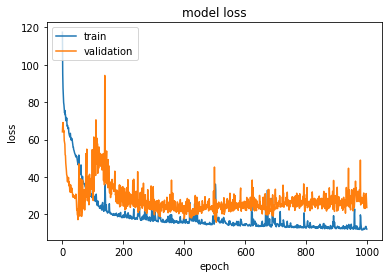

In [21]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
Xnew = np.array([['0.006320','18.000000',
 '2.310000',
 '0.000000',
 '0.538000',
 '6.575000',
 '65.200000',
 '4.090000',
 '1.000000',
 '296.000000',
 '15.300000',
 '396.900000',
 '4.980000']])
ynew=model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=['0.006320' '18.000000' '2.310000' '0.000000' '0.538000' '6.575000'
 '65.200000' '4.090000' '1.000000' '296.000000' '15.300000' '396.900000'
 '4.980000'], Predicted=[30.993946]
